In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,SequentialSampler
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [2]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

# Load data

In [3]:
savePath = "C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/Vanilla_CNN-dogsandcats.pth"

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=0)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180,500)
        self.fc2 = nn.Linear(500,50)
        self.fc3 = nn.Linear(50,2)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [5]:
model = Net()
if is_cuda:
    model.cuda()

model.load_state_dict(torch.load(savePath))

<All keys matched successfully>

In [6]:
simple_transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
test = ImageFolder('C:/Users/Yeonkang/Desktop/Deep_Learning/Image_Recognition/Vanilla_CNN/Python/data/dogsandcats/test', simple_transform)
test_data_loader = torch.utils.data.DataLoader(test, batch_size=64, num_workers=3)

# Predict labels of test data

In [7]:
predicted_res = []

it = iter(test_data_loader)
images,labels = it.next()

outputs = model(images.cuda())
_,predicted = torch.max(outputs,1)
temp = predicted.cpu().numpy().flatten()
predicted_res.extend(temp)

In [8]:
outputs

tensor([[-5.4045e+00, -4.5066e-03],
        [-6.3465e-01, -7.5528e-01],
        [-1.1167e+00, -3.9654e-01],
        [-1.6569e+01, -1.1921e-07],
        [-8.0629e+00, -3.1502e-04],
        [-8.6695e-01, -5.4513e-01],
        [-3.4000e-02, -3.3983e+00],
        [-7.4841e+00, -5.6215e-04],
        [-4.2648e-01, -1.0579e+00],
        [-3.2992e-04, -8.0168e+00],
        [-1.2628e-02, -4.3781e+00],
        [ 0.0000e+00, -3.0662e+01],
        [-4.9216e-02, -3.0360e+00],
        [-3.6955e-06, -1.2521e+01],
        [-5.8805e-02, -2.8628e+00],
        [-1.3508e+01, -1.3113e-06],
        [-6.6279e+00, -1.3239e-03],
        [-2.4533e-03, -6.0116e+00],
        [-8.5771e-01, -5.5188e-01],
        [-1.7009e-02, -4.0825e+00],
        [-6.7052e+00, -1.2252e-03],
        [-2.6279e+00, -7.4974e-02],
        [-6.1131e-02, -2.8251e+00],
        [-5.9885e-01, -7.9727e-01],
        [-2.1458e-06, -1.3056e+01],
        [-3.4913e+00, -3.0936e-02],
        [-1.7356e-03, -6.3573e+00],
        [-8.4625e-01, -5.604

In [9]:
torch.max(outputs,1)

torch.return_types.max(
values=tensor([-4.5066e-03, -6.3465e-01, -3.9654e-01, -1.1921e-07, -3.1502e-04,
        -5.4513e-01, -3.4000e-02, -5.6215e-04, -4.2648e-01, -3.2992e-04,
        -1.2628e-02,  0.0000e+00, -4.9216e-02, -3.6955e-06, -5.8805e-02,
        -1.3113e-06, -1.3239e-03, -2.4533e-03, -5.5188e-01, -1.7009e-02,
        -1.2252e-03, -7.4974e-02, -6.1131e-02, -5.9885e-01, -2.1458e-06,
        -3.0936e-02, -1.7356e-03, -5.6040e-01, -4.0964e-01, -2.9869e-04,
        -3.3698e-03, -7.7163e-02, -9.1906e-05, -4.0173e-05, -5.9379e-03,
        -3.3302e-04, -7.6410e-05, -1.4496e-02, -1.6963e-01, -1.9781e-01,
        -6.9252e-02, -8.7283e-04, -8.1458e-02, -1.5746e-02, -4.3308e-01,
        -6.1898e-04,  0.0000e+00, -3.4574e-03, -4.4549e-02, -9.1671e-02,
        -9.3289e-02, -4.7314e-01, -9.5367e-07, -1.2981e-01, -1.3628e-02,
        -8.6185e-05, -9.6674e-05, -2.7846e-02, -2.2769e-05, -4.1728e-01,
        -1.5180e-01, -6.3417e-05, -7.4608e-02, -3.2396e-01], device='cuda:0',
       grad_fn=

In [10]:
predicted

tensor([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], device='cuda:0')

In [11]:
temp

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

- 1~1: Code for understanding an iteration

In [12]:
predicted_res = []
it = iter(test_data_loader)

for i in range(len(it)):
    images,labels = it.next()
    outputs = model(images.cuda())
    _,predicted = torch.max(outputs,1)
    temp = predicted.cpu().numpy().flatten()
    predicted_res.extend(temp)

In [13]:
def imshow(inp):
    inp = inp.numpy().transpose((1,2,0))
    mean,std = np.array([0.485,0.456,0.406]),np.array([0.229,0.224,0.225])
    inp = std * inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp)

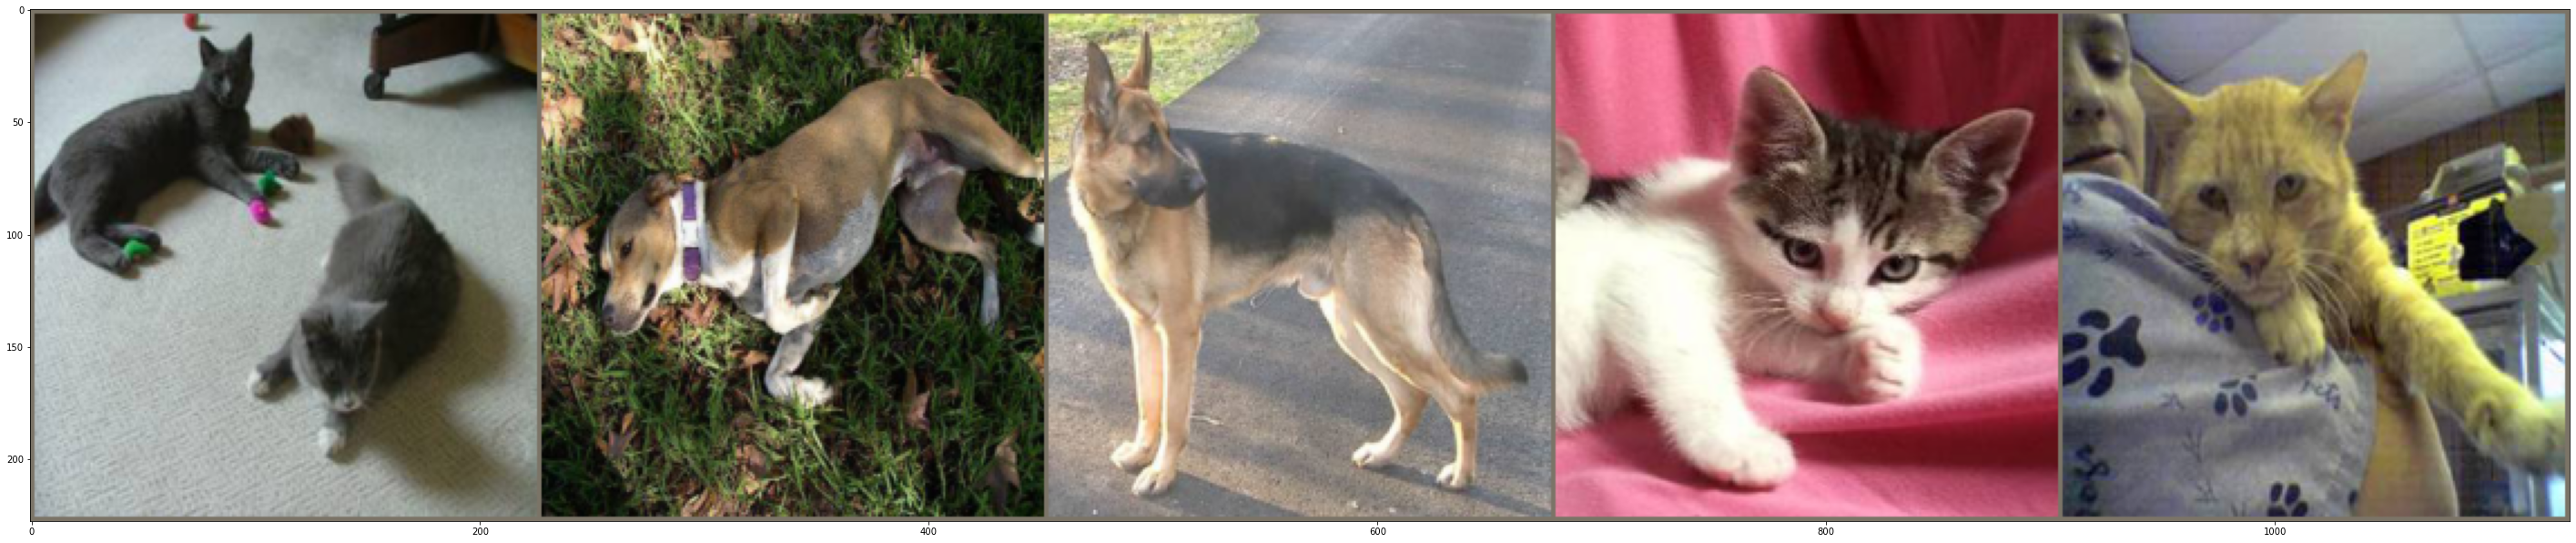

In [14]:
plt.figure(figsize=(50,20))
imshow(torchvision.utils.make_grid(images[-5:]))

In [15]:
predicted_res[-5:]

[0, 1, 0, 0, 1]

- cat : 0
- dog : 1

In [16]:
def lexNumbers(n): 
    s = [] 
    for i in range(1,n+1): 
        s.append(str(i)) 
    s.sort()
    ans = []
    for i in range(n): 
        ans.append(int(s[i]))
    return ans

In [17]:
idx = lexNumbers(len(test))

sample_submission = pd.DataFrame(predicted_res, index=idx, columns=['predicted']).sort_index()
sample_submission

,predicted
1,1
2,1
3,1
4,1
5,0
...,...
12496,0
12497,0
12498,0
12499,1


References
- https://github.com/svishnu88/DLwithPyTorch
- https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html